In [1]:
import pandas as pd
import os

test = pd.read_csv(os.path.join('data','all_platts_1week_clean.csv'))
test

Unnamed: 0                                               body  \
0             0   Spanish crude import volumes increased 11% ye...   
1             1   A number of refineries in China have resumed ...   
2             2   Some refineries in the Asia-Pacific region in...   
3             3   The physical low sulfur (1%S) fuel oil Med-No...   
4             4   Bunkering activity in India has experienced s...   
..          ...                                                ...   
153         367   The Asian middle distillates complex could be...   
154         368   The combined open interest for front-month Si...   
155         369   Production will be increasing “in the near fu...   
156         370   Container ship Groton was attacked 125 nautic...   
157         371   A drone strike on an oil depot in Russia’s Be...   

                                              headline  \
0    SPAIN DATA: H1 crude imports rise 11% to 1.4 m...   
1    REFINERY NEWS: Host of Chinese units back from...   
2    REFINERY NEWS ROUNDUP: Mixed runs in Asia-Pacific   
3    Physical 1%S fuel oil Med-North spread hits re...   
4    Indian ports see Jan-July bunker, STS calls up...   
..                                                 ...   
153  ASIA MIDDLE DISTILLATES: Key market indicators...   
154  ICE front-month Singapore HSFO open interest r...   
155  REFINERY NEWS: Fort Energy at Fujairah ‘remain...   
156  Container ship Groton attacked near Yemen amid...   
157  Oil depot in Russia’s Belgorod region hit by d...   

                   updatedDate             topic_prediction  \
0    2024-08-08 12:11:55+00:00                    Crude Oil   
1    2024-08-08 11:51:12+00:00  Macroeconomic & Geopolitics   
2    2024-08-08 11:50:48+00:00  Macroeconomic & Geopolitics   
3    2024-08-08 11:28:20+00:00           Middle Distillates   
4    2024-08-08 11:27:15+00:00            Heavy Distillates   
..                         ...                          ...   
153  2024-08-05 01:50:17+00:00           Middle Distillates   
154  2024-08-05 01:26:07+00:00            Heavy Distillates   
155  2024-08-05 00:45:56+00:00  Macroeconomic & Geopolitics   
156  2024-08-04 12:25:30+00:00  Macroeconomic & Geopolitics   
157  2024-08-04 10:14:50+00:00  Macroeconomic & Geopolitics   

              topic_verification  negative_score  neutral_score  \
0                      Crude Oil        0.991473       0.005524   
1    Macroeconomic & Geopolitics        0.417054       0.845595   
2    Macroeconomic & Geopolitics        0.268708       0.044504   
3             Middle Distillates        0.951985       0.009613   
4              Heavy Distillates        0.098844       0.059348   
..                           ...             ...            ...   
153           Middle Distillates        0.034932       0.310855   
154            Heavy Distillates        0.368089       0.017483   
155  Macroeconomic & Geopolitics        0.775953       0.520116   
156  Macroeconomic & Geopolitics        0.245594       0.044671   
157  Macroeconomic & Geopolitics        0.243901       0.951199   

     positive_score trend_prediction trend_verification  
0          0.519264          Bearish            Bearish  
1          0.180685          Neutral            Neutral  
2          0.992063          Bullish            Bullish  
3          0.822905          Bearish            Bearish  
4          0.997325          Bullish            Bullish  
..              ...              ...                ...  
153        0.993474          Bullish            Bullish  
154        0.994805          Bullish            Bullish  
155        0.177664          Bearish            Bearish  
156        0.994086          Bullish            Bullish  
157        0.129076          Neutral            Neutral  

[158 rows x 11 columns]

In [4]:
test.to_excel('evaluation.xlsx')

In [9]:
train = test.drop(columns=['Unnamed: 0', 'body', 'updatedDate', 'topic_prediction', 'negative_score', 'neutral_score', 'positive_score', 'trend_prediction', 'trend_verification'])

In [11]:
train.to_csv('convert_first.csv')

In [12]:
dated_brent = pd.read_csv('data/dated_brent_allbate.csv')

In [13]:
dated_brent = dated_brent[dated_brent['assessDate'] >= '2024-08-04']
dated_brent = dated_brent[dated_brent['bate']=='c']

In [14]:
dated_brent

Unnamed: 0 bate   value  assessDate isCorrected              modDate  \
8019        8019    c  76.700  2024-08-05           N  2024-08-05 17:55:34   
8022        8022    c  76.275  2024-08-06           N  2024-08-06 17:48:25   
8025        8025    c  79.910  2024-08-07           N  2024-08-07 19:01:31   
8028        8028    c  81.100  2024-08-08           N  2024-08-08 18:15:44   
8031        8031    c  81.615  2024-08-09           N  2024-08-09 18:00:52   

       symbol  
8019  PCAAS00  
8022  PCAAS00  
8025  PCAAS00  
8028  PCAAS00  
8031  PCAAS00

In [1]:
import pandas as pd
eval = pd.read_excel('evaluation.xlsx')
eval

Unnamed: 0                                               body  \
0             0   Spanish crude import volumes increased 11% ye...   
1             1   A number of refineries in China have resumed ...   
2             2   Some refineries in the Asia-Pacific region in...   
3             3   The physical low sulfur (1%S) fuel oil Med-No...   
4             4   Bunkering activity in India has experienced s...   
..          ...                                                ...   
136         136   Saudi Aramco maintained or raised the Asia-bo...   
137         137   The combined open interest for front-month Si...   
138         138   Production will be increasing “in the near fu...   
139         139   Container ship Groton was attacked 125 nautic...   
140         140   A drone strike on an oil depot in Russia’s Be...   

                                              headline  \
0    SPAIN DATA: H1 crude imports rise 11% to 1.4 m...   
1    REFINERY NEWS: Host of Chinese units back from...   
2    REFINERY NEWS ROUNDUP: Mixed runs in Asia-Pacific   
3    Physical 1%S fuel oil Med-North spread hits re...   
4    Indian ports see Jan-July bunker, STS calls up...   
..                                                 ...   
136  Saudi Aramco maintains or raises Asia-bound Se...   
137  ICE front-month Singapore HSFO open interest r...   
138  REFINERY NEWS: Fort Energy at Fujairah ‘remain...   
139  Container ship Groton attacked near Yemen amid...   
140  Oil depot in Russia’s Belgorod region hit by d...   

                   updatedDate             topic_prediction  \
0    2024-08-08 12:11:55+00:00                    Crude Oil   
1    2024-08-08 11:51:12+00:00  Macroeconomic & Geopolitics   
2    2024-08-08 11:50:48+00:00  Macroeconomic & Geopolitics   
3    2024-08-08 11:28:20+00:00           Middle Distillates   
4    2024-08-08 11:27:15+00:00            Heavy Distillates   
..                         ...                          ...   
136  2024-08-05 01:59:16+00:00                    Crude Oil   
137  2024-08-05 01:26:07+00:00            Heavy Distillates   
138  2024-08-05 00:45:56+00:00  Macroeconomic & Geopolitics   
139  2024-08-04 12:25:30+00:00  Macroeconomic & Geopolitics   
140  2024-08-04 10:14:50+00:00  Macroeconomic & Geopolitics   

              topic_verification  negative_score  neutral_score  \
0                      Crude Oil        0.991473       0.005524   
1    Macroeconomic & Geopolitics        0.417054       0.845595   
2    Macroeconomic & Geopolitics        0.268708       0.044504   
3             Middle Distillates        0.951985       0.009613   
4              Heavy Distillates        0.098844       0.059348   
..                           ...             ...            ...   
136                    Crude Oil        0.154642       0.032633   
137            Heavy Distillates        0.368089       0.017483   
138  Macroeconomic & Geopolitics        0.775953       0.520116   
139  Macroeconomic & Geopolitics        0.245594       0.044671   
140  Macroeconomic & Geopolitics        0.243901       0.951199   

     positive_score trend_prediction trend_verification  Unnamed: 11  \
0          0.519264          Bearish            Bearish          NaN   
1          0.180685          Neutral            Neutral          NaN   
2          0.992063          Bullish            Bullish          NaN   
3          0.822905          Bearish            Bearish          NaN   
4          0.997325          Bullish            Bullish          NaN   
..              ...              ...                ...          ...   
136        0.997273          Bullish            Bullish          NaN   
137        0.994805          Bullish            Bullish          NaN   
138        0.177664          Bearish            Bearish          NaN   
139        0.994086          Bullish            Bullish          NaN   
140        0.129076          Neutral            Neutral          NaN   

    Price Data Unnamed: 13  Unnamed: 14 

In [16]:
test = eval[(eval['topic_prediction']=='Macroeconomic & Geopolitics') | (eval['topic_prediction']=='Crude Oil')]
test = test[test['updatedDate'].str.contains('2024-08-08')]
print(f'Bearish prediction {test.negative_score.mean()}\n Neutral prediction {test.neutral_score.mean()}\n Bullish prediction {test.positive_score.mean()}')

Bearish prediction 0.5093043801287273
 Neutral prediction 0.24558571118013772
 Bullish prediction 0.7223830104380737


In [24]:
import pandas as pd
import os

test = pd.read_excel('evaluation.xlsx').drop(columns=['Unnamed: 0']).iloc[:, :9]

test

body  \
0     Spanish crude import volumes increased 11% ye...   
1     A number of refineries in China have resumed ...   
2     Some refineries in the Asia-Pacific region in...   
3     The physical low sulfur (1%S) fuel oil Med-No...   
4     Bunkering activity in India has experienced s...   
..                                                 ...   
136   Saudi Aramco maintained or raised the Asia-bo...   
137   The combined open interest for front-month Si...   
138   Production will be increasing “in the near fu...   
139   Container ship Groton was attacked 125 nautic...   
140   A drone strike on an oil depot in Russia’s Be...   

                                              headline  \
0    SPAIN DATA: H1 crude imports rise 11% to 1.4 m...   
1    REFINERY NEWS: Host of Chinese units back from...   
2    REFINERY NEWS ROUNDUP: Mixed runs in Asia-Pacific   
3    Physical 1%S fuel oil Med-North spread hits re...   
4    Indian ports see Jan-July bunker, STS calls up...   
..                                                 ...   
136  Saudi Aramco maintains or raises Asia-bound Se...   
137  ICE front-month Singapore HSFO open interest r...   
138  REFINERY NEWS: Fort Energy at Fujairah ‘remain...   
139  Container ship Groton attacked near Yemen amid...   
140  Oil depot in Russia’s Belgorod region hit by d...   

                   updatedDate             topic_prediction  \
0    2024-08-08 12:11:55+00:00                    Crude Oil   
1    2024-08-08 11:51:12+00:00  Macroeconomic & Geopolitics   
2    2024-08-08 11:50:48+00:00  Macroeconomic & Geopolitics   
3    2024-08-08 11:28:20+00:00           Middle Distillates   
4    2024-08-08 11:27:15+00:00            Heavy Distillates   
..                         ...                          ...   
136  2024-08-05 01:59:16+00:00                    Crude Oil   
137  2024-08-05 01:26:07+00:00            Heavy Distillates   
138  2024-08-05 00:45:56+00:00  Macroeconomic & Geopolitics   
139  2024-08-04 12:25:30+00:00  Macroeconomic & Geopolitics   
140  2024-08-04 10:14:50+00:00  Macroeconomic & Geopolitics   

              topic_verification  negative_score  neutral_score  \
0                      Crude Oil        0.991473       0.005524   
1    Macroeconomic & Geopolitics        0.417054       0.845595   
2    Macroeconomic & Geopolitics        0.268708       0.044504   
3             Middle Distillates        0.951985       0.009613   
4              Heavy Distillates        0.098844       0.059348   
..                           ...             ...            ...   
136                    Crude Oil        0.154642       0.032633   
137            Heavy Distillates        0.368089       0.017483   
138  Macroeconomic & Geopolitics        0.775953       0.520116   
139  Macroeconomic & Geopolitics        0.245594       0.044671   
140  Macroeconomic & Geopolitics        0.243901       0.951199   

     positive_score trend_prediction  
0          0.519264          Bearish  
1          0.180685          Neutral  
2          0.992063          Bullish  
3          0.822905          Bearish  
4          0.997325          Bullish  
..              ...              ...  
136        0.997273          Bullish  
137        0.994805          Bullish  
138        0.177664          Bearish  
139        0.994086          Bullish  
140        0.129076          Neutral  

[141 rows x 9 columns]

In [29]:
test['updatedDate'] = pd.to_datetime(test['updatedDate'], format='%Y-%m-%d %H:%M:%S%z')

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   body                141 non-null    object             
 1   headline            141 non-null    object             
 2   updatedDate         141 non-null    datetime64[ns, UTC]
 3   topic_prediction    141 non-null    object             
 4   topic_verification  141 non-null    object             
 5   negative_score      141 non-null    float64            
 6   neutral_score       141 non-null    float64            
 7   positive_score      141 non-null    float64            
 8   trend_prediction    141 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(3), object(5)
memory usage: 10.0+ KB


In [ ]:
from datetime import datetime
import numpy as np

test[test['updatedDate']>= datetime.strptime('2024-08-07 00:00:00+00:00', '%Y-%m-%d %H:%M:%S%z')]

In [ ]:
import datetime

test_date = datetime(2024, 8, 4)

# Exploring Other Use-cases

## Common Words

In [2]:
import pandas as pd
import os

df = pd.read_csv(os.path.join('data','all_platts_1week_clean.csv')).drop(columns=['Unnamed: 0']).drop_duplicates()

In [3]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords from nltk if you haven't already
nltk.download('stopwords')

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
place_mapping = {
    'united states': 'United States',
    'u.s.': 'United States',
    'na': 'North America',
    'north america': 'North America',
    'usa': 'United States',
    'american': 'United States',
    'europe': 'Europe',
    'eu': 'Europe',
    'china': 'China',
    'chinese': 'China',
    'russia': 'Russia',
    'arab': 'Arab Countries',
    'middle east': 'Arab Countries',
    'asia': 'Asia',
    'asian': 'Asia',
    'spain': 'Spain',
    'germany': 'Germany',
    'france': 'France',
    'uk': 'United Kingdom',
    'britain': 'United Kingdom',
    'canada': 'Canada',
    'mexico': 'Mexico',
    'brazil': 'Brazil',
    'venezuela': 'Venezuela',
    'angola': 'Angola',
    'nigeria': 'Nigeria',
    'libya': 'Libya',
    'iraq': 'Iraq',
    'iran': 'Iran',
    'kuwait': 'Kuwait',
    'qatar': 'Qatar',
    'saudi arabia': 'Saudi Arabia',
    'gcc': 'Gulf Cooperation Council',
    'asia-pacific': 'Asia',
    'southeast asia': 'Asia',
    'latin america': 'Latin America',
    'caribbean': 'Caribbean',
}

nomenclature_mapping = {
    'petroleum': 'Petroleum',
    'energy': 'Energy',
    'fuel oil': 'Fuel Oil',
    'shale': 'Shale',
    'offshore': 'Offshore',
    'upstream': 'Upstream',
    'hsfo': 'HSFO',
    'downstream': 'Downstream',
    'crude oil': 'Crude Oil',
    'crude' : 'Crude Oil',
    'refinery': 'Refinery',
    'oil field': 'Oil Field',
    'drilling': 'Drilling',
    'gas': 'Gas',
    'liquefied natural gas': 'LNG',
    'natural gas': 'NG',
    'oil': 'Crude Oil',
}

company_mapping = {
    'exxonmobil': 'ExxonMobil',
    'exxon': 'ExxonMobil',
    'chevron': 'Chevron',
    'bp': 'BP',
    'british petroleum': 'BP',
    'shell': 'Shell',
    'total energies': 'TotalEnergies',
    'conoco': 'ConocoPhillips',
    'halliburton': 'Halliburton',
    'slb': 'SLB',
    'schlumberger': 'SLB',
    'devon': 'Devon Energy',
    'occidental': 'Occidental Petroleum',
    'marathon': 'Marathon Oil',
    'valero': 'Valero Energy',
    'aramco': 'Aramco',
}

In [70]:
import pandas as pd
import plotly.express as px
from collections import Counter
import re



# Function to clean, tokenize, and remove stopwords
def tokenize(text):

    text = re.sub(r'[^\w\s]', '', text.lower())
    words = text.split()

    mapped_words = []
    for word in words:
        mapped_word = place_mapping.get(word, 
                        nomenclature_mapping.get(word, 
                        company_mapping.get(word, word)))
        mapped_words.append(mapped_word)

    filtered_words = [word for word in mapped_words if word not in stop_words]
    return filtered_words


# Function to apply filtering and plotting based on search input
def plot_filtered_word_frequencies(search_word, body=False):

    filtered_df = df[df['headline'].str.contains(search_word, case=False) | df['body'].str.contains(search_word, case=False)]
    
    all_words = []
    filtered_df['headline'].apply(lambda x: all_words.extend(tokenize(x)))

    if body:
        filtered_df['body'].apply(lambda x: all_words.extend(tokenize(x)))
    

    word_counts = Counter(all_words)
    top_10_words = word_counts.most_common(20)
    top_10_df = pd.DataFrame(top_10_words, columns=['word', 'frequency'])

    fig = px.bar(top_10_df, x='word', y='frequency', title=f'Top 20 Most Common Words (Excluding Stopwords) for "{search_word}"',
                 labels={'word': 'Word', 'frequency': 'Frequency'}, 
                 text='frequency')
    fig.show()

plot_filtered_word_frequencies('United States', body=True)

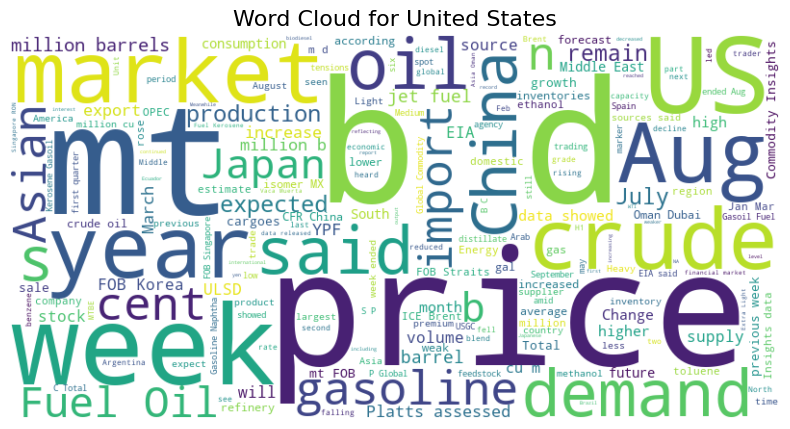

In [68]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

# Function to filter DataFrame and generate a word cloud
def generate_word_cloud(df, search_place):

    standard_place = place_mapping.get(search_place.lower(), search_place)
    synonyms_pattern = '|'.join(re.escape(key) for key in place_mapping if place_mapping[key] == standard_place)
    
    filtered_df = df[df['headline'].str.contains(synonyms_pattern, case=False, na=False) | 
                     df['body'].str.contains(synonyms_pattern, case=False, na=False)]
    
    if filtered_df.empty:
        print(f'No data found for {search_place}. Please try a different location.')
        return
    
    text = ' '.join(filtered_df['headline'].tolist() + filtered_df['body'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.title(f'Word Cloud for {standard_place}', fontsize=16)
    plt.show()

# Example usage: Assuming df is your DataFrame
generate_word_cloud(df, 'United States')

In [19]:
word_counts

Counter({'crude': 43,
         'oil': 35,
         'refinery': 24,
         'news': 17,
         'aug': 17,
         'july': 16,
         'data': 15,
         'market': 15,
         'demand': 12,
         'month': 12,
         'futures': 11,
         'us': 11,
         'fuel': 10,
         'key': 10,
         'indicators': 10,
         'rise': 9,
         'middle': 9,
         'output': 9,
         'low': 9,
         'imports': 8,
         'high': 8,
         'year': 8,
         'amid': 8,
         '2024': 8,
         'q2': 8,
         'prices': 7,
         'hit': 7,
         'east': 7,
         'mil': 7,
         'rises': 7,
         'product': 7,
         'hits': 6,
         'record': 6,
         'south': 6,
         'gas': 6,
         'higher': 6,
         'barrels': 6,
         'asia': 6,
         '59': 6,
         'h1': 5,
         'bd': 5,
         'spread': 5,
         'moc': 5,
         'lng': 5,
         'sour': 5,
         'china': 5,
         'sep': 5,
         'stocks': 5,


In [4]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Load the small English model from spaCy
nlp = spacy.load("en_core_web_sm")

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'text_column': [
        "The United States, USA, china, indonesia, russian, Europe, and Asia are large regions.",
        "Africa is growing fast. Europe and South America are continents.",
        "China, India, and Japan are major countries in Asia.",
        "Brazil is a country in South America, and it's growing."
    ]
}

df = pd.DataFrame(data)

# Function to extract place names using spaCy
def extract_place_names(text):
    doc = nlp(text)
    places = [ent.text for ent in doc.ents if ent.label_ == "GPE"]
    return places

# Apply the function to extract places from the text column
all_places = []
df['text_column'].apply(lambda x: all_places.extend(extract_place_names(x)))

# Count the occurrences of each place name
place_counts = Counter(all_places)

# Get the top 10 most common place names
top_10_places = place_counts.most_common(10)

# Convert the top 10 places to a DataFrame for plotting
top_10_df = pd.DataFrame(top_10_places, columns=['place', 'frequency'])

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='place', data=top_10_df, palette='viridis')
plt.title('Top 10 Most Common Place Names')
plt.xlabel('Frequency')
plt.ylabel('Place')
plt.show()


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject